### Install required libraries

In [1]:
!pip install mpimg

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpimg
from PIL import Image
from pandas.plotting import scatter_matrix

### Read data file 

In [3]:
df=pd.read_csv('/home/ec2-user/data_new_county.csv')

### Print dataset

In [4]:
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Alameda County
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Alameda County
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Alameda County
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Alameda County
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Alameda County


### Check for missing values

In [5]:
df.isnull().sum()

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
county                  0
dtype: int64

### Data statistical summary

In [6]:
df.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19780.000000,19980.000000,19980.000000,19980.000000,19980.000000
mean,10166.746997,-119.495148,35.571717,28.141942,2645.647397,537.913600,1432.461662,499.742593,3.871367,203516.024575
std,5966.626914,1.968704,2.134756,12.267877,2204.600117,424.311973,1143.526778,385.150544,1.907088,113405.625056
min,0.000000,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5036.750000,-121.582500,33.930000,18.000000,1444.000000,295.000000,786.000000,278.000000,2.555100,118600.000000
50%,10035.500000,-118.450000,34.220000,28.000000,2126.000000,433.000000,1168.000000,408.000000,3.526800,176550.000000
75%,15064.250000,-117.990000,37.650000,36.000000,3158.000000,646.250000,1737.000000,604.000000,4.764100,258425.000000
max,20639.000000,-114.470000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Drop Unnamed Column And Nan values

In [7]:
df.dropna(inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

### Describe Total Bedroom

In [8]:
df['total_bedrooms'].describe()

count    19780.000000
mean       537.913600
std        424.311973
min          2.000000
25%        295.000000
50%        433.000000
75%        646.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

### Histogram of different features

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

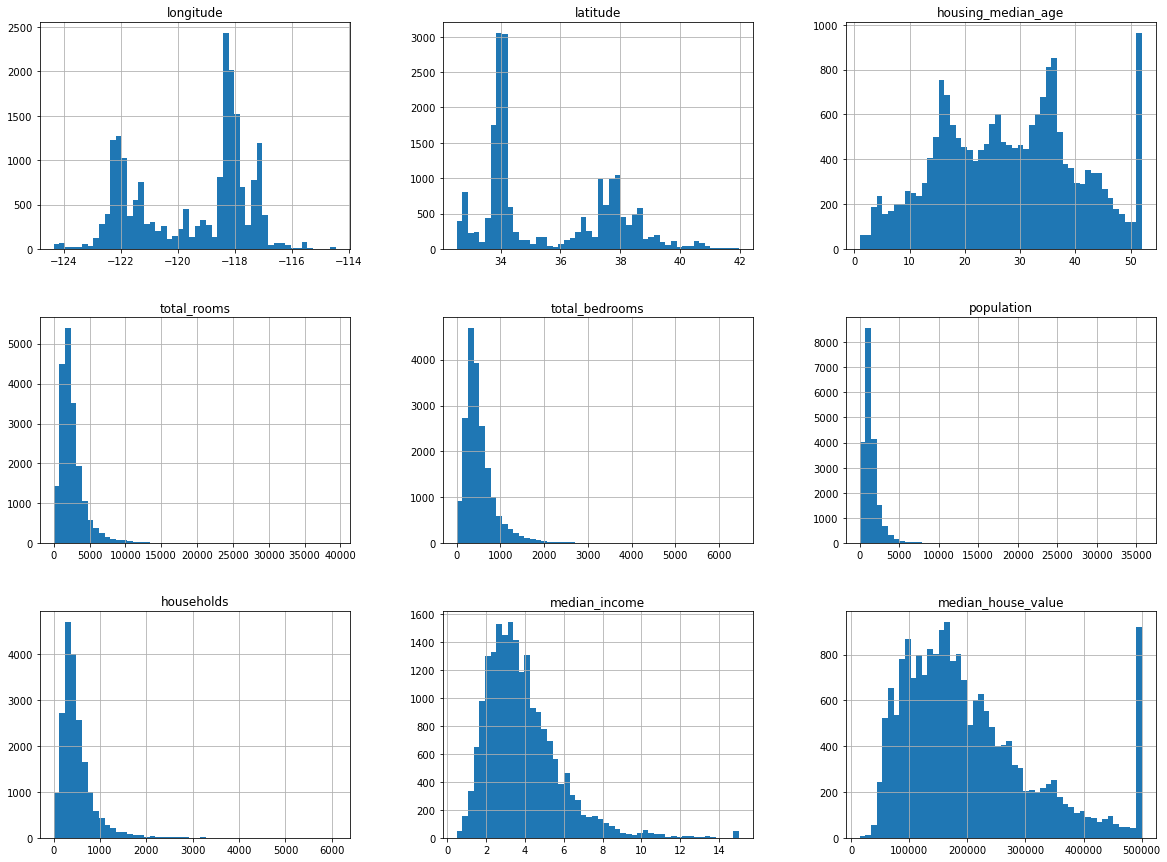

In [9]:
#For understanding the frequency distribution for each of the input features
df.hist(bins=50,figsize=(20,15))

### Ocean proximity value count

In [10]:
df.ocean_proximity.value_counts()

<1H OCEAN     9032
INLAND        6417
NEAR OCEAN    2542
NEAR BAY      1784
ISLAND           5
Name: ocean_proximity, dtype: int64

### Bar Graph for house proximity to ocean

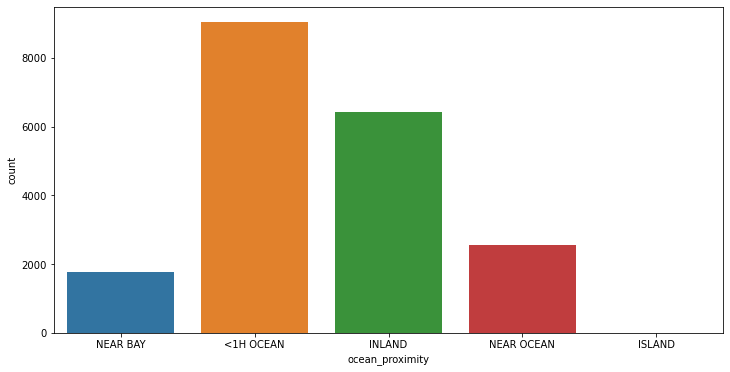

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='ocean_proximity',data=df)
plt.show()

### Visualize housevalue with respect to occen proximity -  BoxPlot

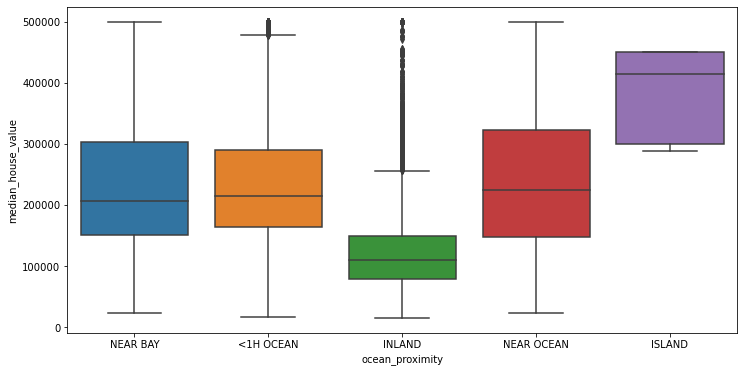

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ocean_proximity',y='median_house_value',data=df)
plt.show()

### Visualize households with respect to occen proximity

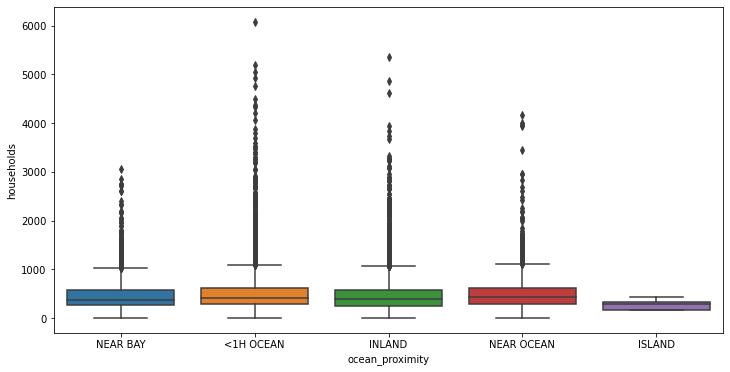

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ocean_proximity',y='households',data=df)
plt.show()

### Visualize housing median age value with respect to occen proximity

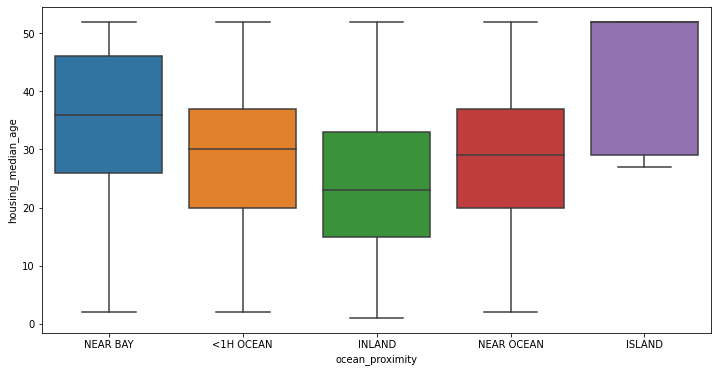

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ocean_proximity',y='housing_median_age',data=df)
plt.show()

### Population Distribution across california

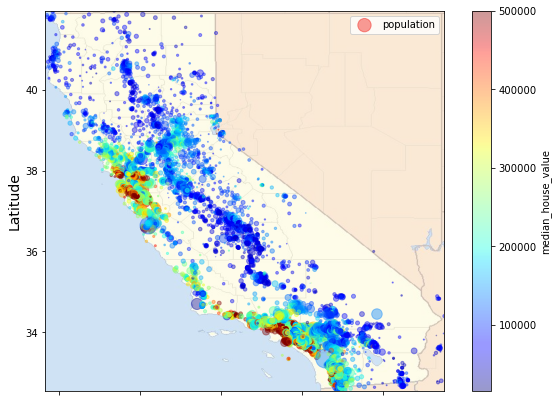

In [15]:
california_img=Image.open('/home/ec2-user/Cali_img.jpeg')
coords = ((df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max()))

df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=df['population']/100, label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(california_img, extent=coords, alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()


### Plotting spatial data on California map

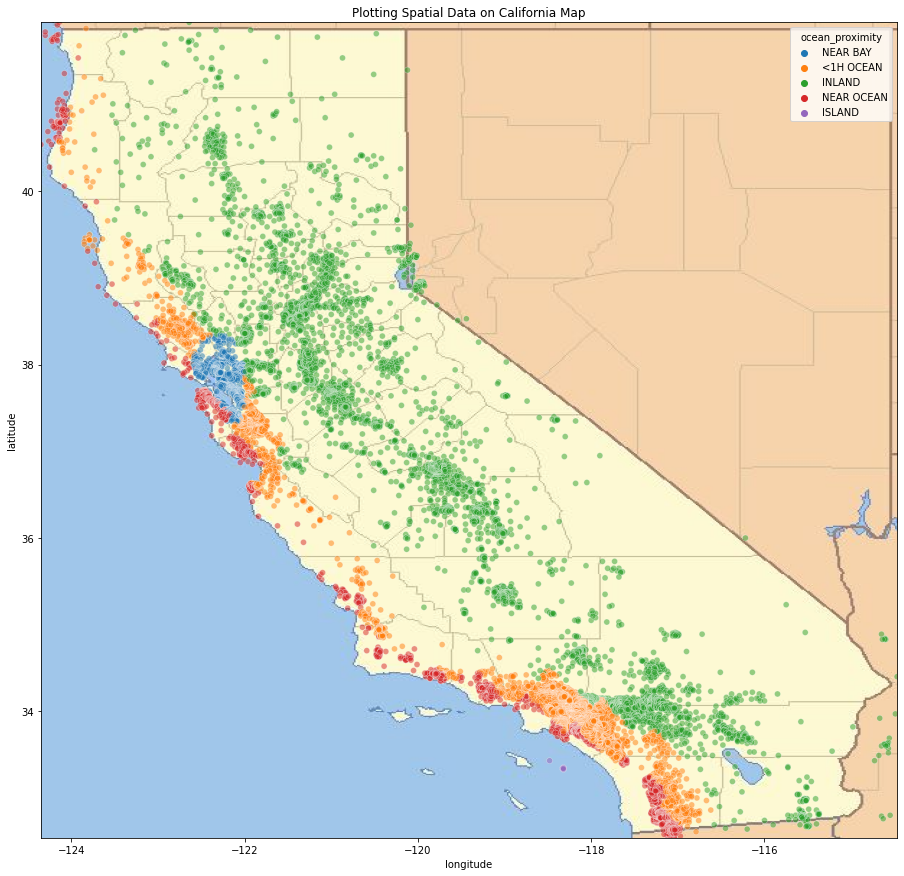

In [16]:
plt.figure(figsize = (30,15))
ax=sns.scatterplot(x='longitude', y='latitude',data = df ,hue='ocean_proximity' ,alpha = 0.5)
ax.set_title('Plotting Spatial Data on California Map')
ax.set_xlim(coords[0],coords[1])
ax.set_ylim(coords[2],coords[3])
ax.imshow(california_img, zorder=0, extent = coords, aspect= 'equal')
plt.show()

### Bin the median income  into 5 categories, and plot the median house value against the median income

<AxesSubplot:>

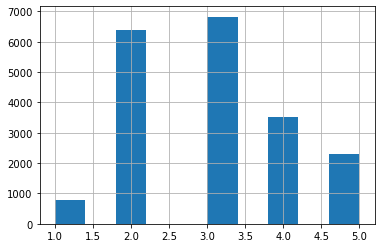

In [17]:
df['income_cat']=pd.cut(df['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])
df['income_cat'].hist()

### Correlation Analysis

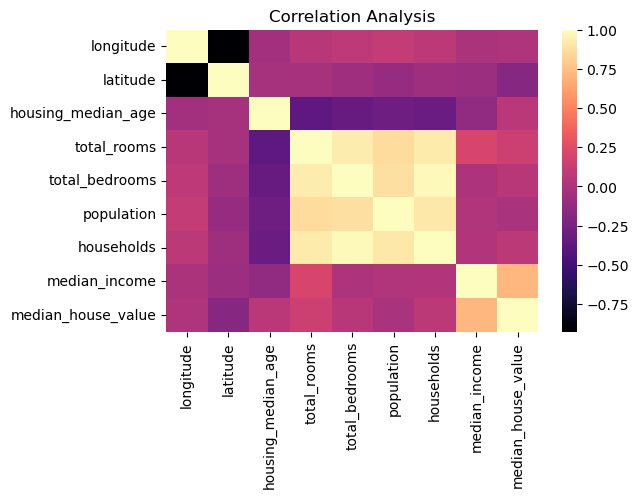

In [18]:
corr = df.corr()
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,annot=False,lw=0,linecolor='white',fmt = "0.2f", cmap="magma")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

### Scatter Matrix For median house value,housing median age, income, and total Bedrooms

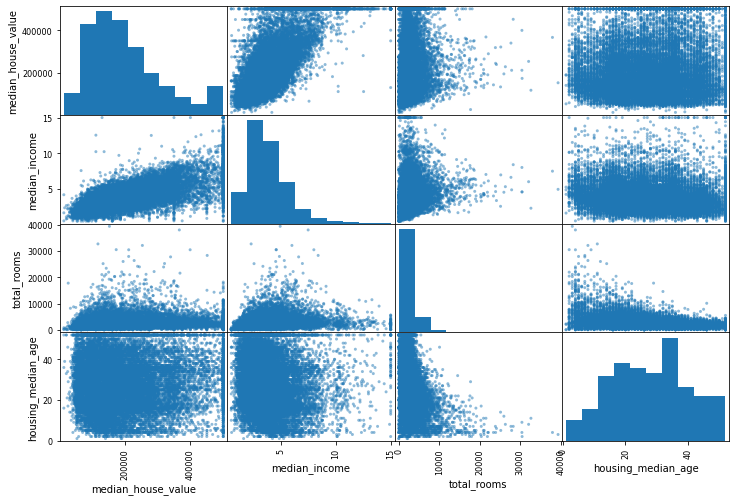

In [19]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

### Print Dataset

In [20]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Alameda County,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Alameda County,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Alameda County,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Alameda County,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Alameda County,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19975,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,Yuba County,2
19976,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,Yuba County,2
19977,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,Yuba County,2
19978,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,Yuba County,2


### Average income and house value of each county

In [21]:
X=df.groupby('county')['median_house_value','median_income'].mean().sort_values(by='median_house_value',ascending=False)

/tmp/ipykernel_18058/2837276046.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  X=df.groupby('county')['median_house_value','median_income'].mean().sort_values(by='median_house_value',ascending=False)


### Plot top 5 counties with highest median house value

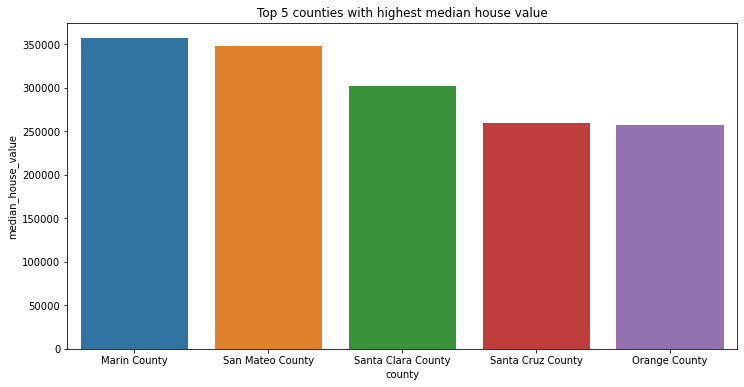

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x=X.index[:5],y=X['median_house_value'][:5],data=X)
plt.title('Top 5 counties with highest median house value')
plt.show() 

### Plot top 5 counties with highest median income

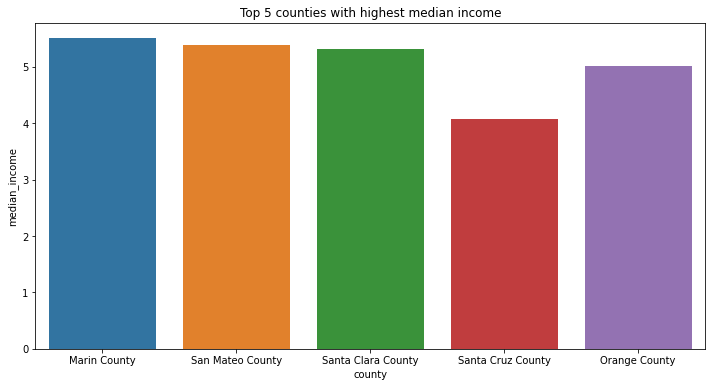

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=X.index[:5],y=X['median_income'][:5],data=X)
plt.title('Top 5 counties with highest median income')
plt.show()

### Data Preprocessing

In the following steps, we preprocess our data based on the following criterias:
<ul>
<li>Adding additional input feature: Population/Room based on each county</li>
<li>Normalizing the Data for better prediction</li>
<li>Converting categorical features to numerical features using One-Hot Encoding</li>
</ul>

### Group by county and sum the total population of each county and sum of total rooms

In [24]:
X=df.groupby('county')['population','total_rooms'].sum().sort_values(by='population',ascending=False).reset_index()
X['population/room']=(X.population/X.total_rooms)

/tmp/ipykernel_18058/378236551.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  X=df.groupby('county')['population','total_rooms'].sum().sort_values(by='population',ascending=False).reset_index()


### Data Merging

In [25]:
df.merge(X[['county', 'population/room']],how='left',on='county')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county,income_cat,population/room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Alameda County,5,0.509078
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Alameda County,5,0.509078
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Alameda County,5,0.509078
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Alameda County,4,0.509078
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Alameda County,3,0.509078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19775,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,Yuba County,2,0.570221
19776,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,Yuba County,2,0.570221
19777,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,Yuba County,2,0.570221
19778,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,Yuba County,2,0.570221


### Copying data columns required to a new dataframe

In [26]:
df_new=df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity', 'county']]
df_new.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Alameda County
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Alameda County
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Alameda County
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Alameda County
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Alameda County


### Normalizing the data

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']]=scaler.fit_transform(df_new[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']])
df_new.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county
0,0.784314,0.022331,0.019711,0.008941,0.020395,0.539668,0.902266,NEAR BAY,Alameda County
1,0.392157,0.180503,0.171349,0.067210,0.186842,0.538027,0.708247,NEAR BAY,Alameda County
2,1.000000,0.037260,0.029179,0.013818,0.028783,0.466028,0.695051,NEAR BAY,Alameda County
3,1.000000,0.032352,0.036163,0.015555,0.035691,0.354699,0.672783,NEAR BAY,Alameda County
4,1.000000,0.041330,0.043148,0.015752,0.042270,0.230776,0.674638,NEAR BAY,Alameda County


### One hot encoding

In [28]:
df_new=pd.get_dummies(df_new,columns=['ocean_proximity','county'],drop_first=True)
df_new.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,...,county_Sonoma County,county_Stanislaus County,county_Sutter County,county_Tehama County,county_Trinity County,county_Tulare County,county_Tuolumne County,county_Ventura County,county_Yolo County,county_Yuba County
0,0.784314,0.022331,0.019711,0.008941,0.020395,0.539668,0.902266,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.392157,0.180503,0.171349,0.067210,0.186842,0.538027,0.708247,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.000000,0.037260,0.029179,0.013818,0.028783,0.466028,0.695051,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.000000,0.032352,0.036163,0.015555,0.035691,0.354699,0.672783,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.000000,0.041330,0.043148,0.015752,0.042270,0.230776,0.674638,0,0,1,...,0,0,0,0,0,0,0,0,0,0
